In [1]:
import os
from time import time
from time import sleep
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


In [3]:
type(data)

dict

In [7]:
df = pd.json_normalize(data['data'])
len(df)



15

In [8]:
#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,10354,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.943696e+07,1.943696e+07,False,NaN,1,NaN,NaN,None,2023-07-23T13:05:00.000Z,29891.076629,7.958893e+09,-15.5374,-0.043197,0.132477,-1.386162,-0.807540,11.980281,8.870210,5.809915e+11,48.5027,6.277126e+11,None,2023-07-23T13:05:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,7145,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201940e+08,1.201940e+08,True,NaN,2,NaN,NaN,None,2023-07-23T13:05:00.000Z,1873.968033,4.275784e+09,4.2383,-0.085732,-0.654839,-3.048183,-0.089785,3.144820,1.351834,2.252397e+11,18.8059,2.252397e+11,None,2023-07-23T13:05:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether USDt,USDT,tether,57527,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.379619e+10,8.670779e+10,True,NaN,3,NaN,NaN,None,2023-07-23T13:05:00.000Z,1.000070,1.484645e+10,-24.6647,-0.035928,-0.001325,-0.035625,0.001390,0.004078,0.003108,8.380206e+10,6.9969,8.671386e+10,None,2023-07-23T13:05:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,52,XRP,XRP,xrp,999,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.254409e+10,9.998862e+10,False,NaN,4,NaN,NaN,None,2023-07-23T13:05:00.000Z,0.739582,1.912676e+09,28.6128,-0.288513,-3.924731,-1.182391,50.921445,62.572476,59.418661,3.886067e+10,3.2446,7.395822e+10,None,2023-07-23T13:05:00.000Z,NaN,NaN,NaN,NaN,NaN
4,1839,BNB,BNB,bnb,1529,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538565e+08,1.538565e+08,False,NaN,5,NaN,NaN,None,2023-07-23T13:05:00.000Z,242.505079,2.821971e+08,-14.3776,0.086227,-0.006567,-2.659219,-0.189056,-21.463366,-26.970378,3.731099e+10,3.1147,3.731099e+10,None,2023-07-23T13:05:00.000Z,NaN,NaN,NaN,NaN,NaN


In [9]:
df['Timestamp'] = pd.to_datetime('now')
df.head()

<ipython-input-9-dd0a9ce29a8d>:1: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['Timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,10354,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.943696e+07,1.943696e+07,False,NaN,1,NaN,NaN,None,2023-07-23T13:05:00.000Z,29891.076629,7.958893e+09,-15.5374,-0.043197,0.132477,-1.386162,-0.807540,11.980281,8.870210,5.809915e+11,48.5027,6.277126e+11,None,2023-07-23T13:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-23 13:14:19.669568
1,1027,Ethereum,ETH,ethereum,7145,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201940e+08,1.201940e+08,True,NaN,2,NaN,NaN,None,2023-07-23T13:05:00.000Z,1873.968033,4.275784e+09,4.2383,-0.085732,-0.654839,-3.048183,-0.089785,3.144820,1.351834,2.252397e+11,18.8059,2.252397e+11,None,2023-07-23T13:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-23 13:14:19.669568
2,825,Tether USDt,USDT,tether,57527,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.379619e+10,8.670779e+10,True,NaN,3,NaN,NaN,None,2023-07-23T13:05:00.000Z,1.000070,1.484645e+10,-24.6647,-0.035928,-0.001325,-0.035625,0.001390,0.004078,0.003108,8.380206e+10,6.9969,8.671386e+10,None,2023-07-23T13:05:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-23 13:14:19.669568
3,52,XRP,XRP,xrp,999,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.254409e+10,9.998862e+10,False,NaN,4,NaN,NaN,None,2023-07-23T13:05:00.000Z,0.739582,1.912676e+09,28.6128,-0.288513,-3.924731,-1.182391,50.921445,62.572476,59.418661,3.886067e+10,3.2446,7.395822e+10,None,2023-07-23T13:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-23 13:14:19.669568
4,1839,BNB,BNB,bnb,1529,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538565e+08,1.538565e+08,False,NaN,5,NaN,NaN,None,2023-07-23T13:05:00.000Z,242.505079,2.821971e+08,-14.3776,0.086227,-0.006567,-2.659219,-0.189056,-21.463366,-26.970378,3.731099e+10,3.1147,3.731099e+10,None,2023-07-23T13:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-23 13:14:19.669568


In [10]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)


    # save to csv file
    if not os.path.isfile(r'api.csv'):
      df.to_csv(r'api.csv', header='column_names')
    else:
      df.to_csv(r'api.csv', mode='a', header=False)



In [12]:
for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

<ipython-input-10-b083f12f2e52>:28: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-10-b083f12f2e52>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


<ipython-input-10-b083f12f2e52>:28: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-10-b083f12f2e52>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


<ipython-input-10-b083f12f2e52>:28: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-10-b083f12f2e52>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


KeyboardInterrupt: ignored

In [13]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,10354,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.943696e+07,1.943696e+07,False,NaN,1,NaN,NaN,None,2023-07-23T13:05:00.000Z,29891.076629,7.958893e+09,-15.5374,-0.043197,0.132477,-1.386162,-0.807540,11.980281,8.870210,5.809915e+11,48.5027,6.277126e+11,None,2023-07-23T13:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-23 13:14:19.669568
1,1027,Ethereum,ETH,ethereum,7145,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201940e+08,1.201940e+08,True,NaN,2,NaN,NaN,None,2023-07-23T13:05:00.000Z,1873.968033,4.275784e+09,4.2383,-0.085732,-0.654839,-3.048183,-0.089785,3.144820,1.351834,2.252397e+11,18.8059,2.252397e+11,None,2023-07-23T13:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-23 13:14:19.669568
2,825,Tether USDt,USDT,tether,57527,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.379619e+10,8.670779e+10,True,NaN,3,NaN,NaN,None,2023-07-23T13:05:00.000Z,1.000070,1.484645e+10,-24.6647,-0.035928,-0.001325,-0.035625,0.001390,0.004078,0.003108,8.380206e+10,6.9969,8.671386e+10,None,2023-07-23T13:05:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-23 13:14:19.669568
3,52,XRP,XRP,xrp,999,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.254409e+10,9.998862e+10,False,NaN,4,NaN,NaN,None,2023-07-23T13:05:00.000Z,0.739582,1.912676e+09,28.6128,-0.288513,-3.924731,-1.182391,50.921445,62.572476,59.418661,3.886067e+10,3.2446,7.395822e+10,None,2023-07-23T13:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-23 13:14:19.669568
4,1839,BNB,BNB,bnb,1529,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538565e+08,1.538565e+08,False,NaN,5,NaN,NaN,None,2023-07-23T13:05:00.000Z,242.505079,2.821971e+08,-14.3776,0.086227,-0.006567,-2.659219,-0.189056,-21.463366,-26.970378,3.731099e+10,3.1147,3.731099e+10,None,2023-07-23T13:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-23 13:14:19.669568
5,3408,USD Coin,USDC,usd-coin,13411,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.685668e+10,2.685668e+10,False,NaN,6,NaN,NaN,None,2023-07-23T13:05:00.000Z,0.999981,1.972875e+09,-66.3873,-0.030456,-0.000688,-0.006668,0.008477,0.001387,-0.009654,2.685616e+10,2.2420,2.685616e+10,None,2023-07-23T13:05:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-23 13:14:19.669568
6,2010,Cardano,ADA,cardano,879,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.499296e+10,3.599913e+10,False,NaN,7,NaN,NaN,None,2023-07-23T13:05:00.000Z,0.314443,1.802233e+08,-6.8309,-0.126046,0.902445,-2.187486,8.005038,-13.849920,-18.979647,1.100327e+10,0.9186,1.414991e+10,None,2023-07-23T13:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-23 13:14:19.669568
7,74,Dogecoin,DOGE,dogecoin,748,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.402904e+11,1.402904e+11,True,NaN,8,NaN,NaN,None,2023-07-23T13:05:00.000Z,0.072058,2.905735e+08,-55.3422,-0.051603,0.586586,1.185260,9.295325,1.207459,-8.875184,1.010905e+10,0.8440,1.010905e+10,None,2023-07-23T13:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-23 13:14:19.669568
8,5426,Solana,SOL,solana,490,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",N

In [14]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df.head()


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,10354,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19436956.00000,19436956.00000,False,NaN,1,NaN,NaN,None,2023-07-23T13:05:00.000Z,29891.07663,7958892944.18454,-15.53740,-0.04320,0.13248,-1.38616,-0.80754,11.98028,8.87021,580991541237.13293,48.50270,627712609216.16003,None,2023-07-23T13:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-23 13:14:19.669568
1,1027,Ethereum,ETH,ethereum,7145,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120194007.91975,120194007.91975,True,NaN,2,NaN,NaN,None,2023-07-23T13:05:00.000Z,1873.96803,4275783989.01533,4.23830,-0.08573,-0.65484,-3.04818,-0.08979,3.14482,1.35183,225239728562.29764,18.80590,225239728562.29999,None,2023-07-23T13:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-23 13:14:19.669568
2,825,Tether USDt,USDT,tether,57527,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83796187894.45963,86707788905.04649,True,NaN,3,NaN,NaN,None,2023-07-23T13:05:00.000Z,1.00007,14846448402.48588,-24.66470,-0.03593,-0.00132,-0.03563,0.00139,0.00408,0.00311,83802055980.02402,6.99690,86713860884.42000,None,2023-07-23T13:05:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-23 13:14:19.669568
3,52,XRP,XRP,xrp,999,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,52544091958.00000,99988621362.00000,False,NaN,4,NaN,NaN,None,2023-07-23T13:05:00.000Z,0.73958,1912675862.50196,28.61280,-0.28851,-3.92473,-1.18239,50.92144,62.57248,59.41866,38860672640.70329,3.24460,73958215267.60001,None,2023-07-23T13:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-23 13:14:19.669568
4,1839,BNB,BNB,bnb,1529,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153856531.87001,153856531.87001,False,NaN,5,NaN,NaN,None,2023-07-23T13:05:00.000Z,242.50508,282197065.58738,-14.37760,0.08623,-0.00657,-2.65922,-0.18906,-21.46337,-26.97038,37310990362.32549,3.11470,37310990362.33000,None,2023-07-23T13:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-23 13:14:19.669568


In [15]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h',	'quote.USD.percent_change_7d',	'quote.USD.percent_change_30d',	'quote.USD.percent_change_60d',	'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.03766,0.08056,-1.46155,-0.69906,12.89543,8.35068
Ethereum,-0.01279,-0.72303,-3.05124,-0.00152,4.00664,0.60327
Tether USDt,-0.00069,-0.01437,-0.03665,-0.01520,0.00529,-0.00089
XRP,-0.11403,-3.91243,-1.65346,51.36717,63.41849,59.04869
BNB,0.02768,-0.07293,-2.53650,0.04390,-21.01436,-27.14430
USD Coin,0.00254,-0.00738,-0.00238,0.00155,0.00929,0.00069
Cardano,0.15474,0.87063,-1.91000,8.75557,-13.49095,-19.58406
Dogecoin,0.09553,0.55491,1.42214,9.63378,2.00787,-9.23161
Solana,0.01690,-4.06616,-13.06743,50.71005,28.33080,12.79456


In [16]:
pd.set_option('display.max_rows', None)
df4 = df3.stack()
df4

name                                         
Bitcoin          quote.USD.percent_change_1h     -0.03766
                 quote.USD.percent_change_24h     0.08056
                 quote.USD.percent_change_7d     -1.46155
                 quote.USD.percent_change_30d    -0.69906
                 quote.USD.percent_change_60d    12.89543
                 quote.USD.percent_change_90d     8.35068
Ethereum         quote.USD.percent_change_1h     -0.01279
                 quote.USD.percent_change_24h    -0.72303
                 quote.USD.percent_change_7d     -3.05124
                 quote.USD.percent_change_30d    -0.00152
                 quote.USD.percent_change_60d     4.00664
                 quote.USD.percent_change_90d     0.60327
Tether USDt      quote.USD.percent_change_1h     -0.00069
                 quote.USD.percent_change_24h    -0.01437
                 quote.USD.percent_change_7d     -0.03665
                 quote.USD.percent_change_30d    -0.01520
                 quote.USD

In [17]:
type(df4)

pandas.core.series.Series

In [18]:
pd.set_option('display.min_rows', None)
df5 = df4.to_frame(name='values')
df5


values
name                                                  
Bitcoin         quote.USD.percent_change_1h   -0.03766
                quote.USD.percent_change_24h   0.08056
                quote.USD.percent_change_7d   -1.46155
                quote.USD.percent_change_30d  -0.69906
                quote.USD.percent_change_60d  12.89543
                quote.USD.percent_change_90d   8.35068
Ethereum        quote.USD.percent_change_1h   -0.01279
                quote.USD.percent_change_24h  -0.72303
                quote.USD.percent_change_7d   -3.05124
                quote.USD.percent_change_30d  -0.00152
                quote.USD.percent_change_60d   4.00664
                quote.USD.percent_change_90d   0.60327
Tether USDt     quote.USD.percent_change_1h   -0.00069
                quote.USD.percent_change_24h  -0.01437
                quote.USD.percent_change_7d   -0.03665
                quote.USD.percent_change_30d  -0.01520
                quote.USD.percent_change_60d   0.00529
                quote.USD.percent_change_90d  -0.00089
XRP             quote.USD.percent_change_1h   -0.11403
                quote.USD.percent_change_24h  -3.91243
                quote.USD.percent_change_7d   -1.65346
                quote.USD.percent_change_30d  51.36717
                quote.USD.percent_change_60d  63.41849
                quote.USD.percent_change_90d  59.04869
BNB             quote.USD.percent_change_1h    0.02768
                quote.USD.percent_change_24h  -0.07293
                quote.USD.percent_change_7d   -2.53650
                quote.USD.percent_change_30d   0.04390
                quote.USD.percent_change_60d -21.01436
                quote.USD.percent_change_90d -27.14430
USD Coin        quote.USD.percent_change_1h    0.00254
                quote.USD.percent_change_24h  -0.00738
                quote.USD.percent_change_7d   -0.00238
                quote.USD.percent_change_30d   0.00155
                quote.USD.percent_change_60d   0.00929
                quote.USD.percent_change_90d   0.00069
Cardano         quote.USD.percent_change_1h    0.15474
                quote.USD.percent_change_24h   0.87063
                quote.USD.percent_change_7d   -1.91000
                quote.USD.percent_change_30d   8.75557
                quote.USD.percent_change_60d -13.49095
                quote.USD.percent_change_90d -19.58406
Dogecoin        quote.USD.percent_change_1h    0.09553
                quote.USD.percent_change_24h   0.55491
                quote.USD.percent_change_7d    1.42214
                quote.USD.percent_change_30d   9.63378
                quote.USD.percent_change_60d   2.00787
                quote.USD.percent_change_90d  -9.23161
Solana          quote.USD.percent_change_1h    0.01690
                quote.USD.percent_change_24h  -4.06616
                quote.USD.percent_change_7d  -13.06743
                quote.USD.percent_change_30d  50.71005
                quote.USD.percent_change_60d  28.33080
                quote.USD.percent_change_90d  12.79456
TRON            quote.USD.percent_change_1h   -0.04834
                quote.USD.percent_change_24h  -2.85274
                quote.USD.percent_change_7d    4.06203
                quote.USD.percent_change_30d  15.84994
                quote.USD.percent_change_60d   7.82472
                quote.USD.percent_change_90d  25.27850
Polygon         quote.USD.percent_change_1h   -0.18987
                quote.USD.percent_change_24h  -1.86132
                quote.USD.percent_change_7d   -5.01906
                quote.USD.percent_change_30d  12.98323
                quote.USD.percent_change_60d -13.30421
                quote.USD.percent_change_90d -25.24852
Litecoin        quote.USD.percent_change_1h   -0.18456
                quote.USD.percent_change_24h  -1.42290
                quote.USD.percent_change_7d   -2.49234
                quote.USD.percent_change_30d   7.51925
                quote.USD.percent_change_60d   7.22401
                quote.USD.percent

In [19]:
df5.count()


values    96
dtype: int64

In [20]:
index = pd.Index(range(90))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.03766
1,Bitcoin,quote.USD.percent_change_24h,0.08056
2,Bitcoin,quote.USD.percent_change_7d,-1.46155
3,Bitcoin,quote.USD.percent_change_30d,-0.69906
4,Bitcoin,quote.USD.percent_change_60d,12.89543
5,Bitcoin,quote.USD.percent_change_90d,8.35068
6,Ethereum,quote.USD.percent_change_1h,-0.01279
7,Ethereum,quote.USD.percent_change_24h,-0.72303
8,Ethereum,quote.USD.percent_change_7d,-3.05124
9,Ethereum,quote.USD.percent_change_30d,-0.00152


In [21]:
# change column name
df7 = df6.rename(columns={'level_1' : 'percent_change'})

In [22]:

df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7.head()

,name,percent_change,values
0,Bitcoin,1h,-0.03766
1,Bitcoin,24h,0.08056
2,Bitcoin,7d,-1.46155
3,Bitcoin,30d,-0.69906
4,Bitcoin,60d,12.89543


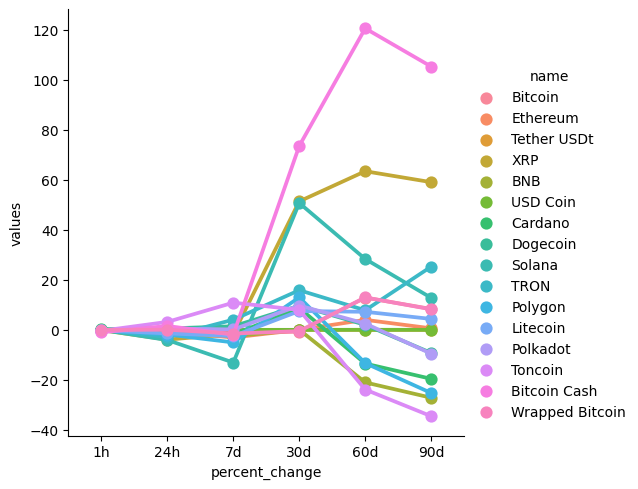

In [23]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')